# Playing with the visits table 

### Alex Lu | Summer Q 17-18  
---

September 2018

**OBJECTIVE**

---

I have been tasked with getting distributions of age, sex, for Arbor and PFC patients over the last year. This notebook examines the age and sex distributions from a visits paradigm (and not a unique'd patients paradigm). 

First, let's import all of the stuff that we'll need

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from utils.indicator import *
from utils.file_ops import *
from datetime import datetime
%matplotlib inline

We want to filter on the time of visit for longitudinal visualization. First, we should do a conversion on the format of the time string to make it more workable. Then, we're going to make this new 'ts' column the index, and drop the string form VisitDate series. 

In [91]:
def time_filter(t1, t2, df):
    # accepts numerical tuples of form (year, mon, day)
    bound1 = datetime(*t1)
    bound2 = datetime(*t2)
    return df[bound1:bound2]

In [92]:
path_visits = "visits_data/both_clinics_all_summer18.csv"
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits.head()

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,DateFirstKnown,VisitDateTime,Sex
0,AFC,N0067530,38,ADMIN CHART REVIEW NOTE,6/3/2018 9:55:38 AM,6/3/2018 10:40:19 AM,F
1,AFC,N0066705,20,ADMIN CHART REVIEW NOTE,4/29/2018 11:32:06 AM,6/3/2018 12:10:22 PM,F
2,REMOTE-PFC,N0067950,61,ADMIN CHART REVIEW NOTE,6/30/2018 8:36:58 AM,6/30/2018 10:26:46 AM,F
3,AFC,N0067305,83,ADMIN CHART REVIEW NOTE,5/26/2018 10:25:55 AM,7/1/2018 10:43:02 AM,U
4,REMOTE-PFC,N0051735,52,ADMIN CHART REVIEW NOTE,10/31/2015 9:48:19 AM,7/28/2018 9:54:06 AM,F


In [93]:
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
arbor_general_visits = df_visits[df_visits['VisitType'] == 'ARBOR GENERAL VISIT']
pfc_general_visits = df_visits[df_visits['VisitType'] == 'PFC NEW PATIENT VISIT']

print arbor_general_visits.describe()
print pfc_general_visits.describe()

        Age(Year)
count  131.000000
mean    46.664122
std     17.963044
min     19.000000
25%     29.500000
50%     49.000000
75%     63.000000
max     77.000000
       Age(Year)
count  66.000000
mean   52.560606
std    17.375605
min     4.000000
25%    47.250000
50%    55.000000
75%    63.000000
max    81.000000


In [94]:
arbor_general_visits.head(5)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-06-03 09:45:00,AFC,N0067522,25,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 09:04:32
2018-06-03 09:45:00,AFC,N0067508,19,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:44:35
2018-06-03 09:45:00,AFC,N0067515,19,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:46:56
2018-06-03 09:45:00,AFC,N0051120,66,ARBOR GENERAL VISIT,M,2018-06-03 09:45:00,2015-09-27 10:08:41
2018-06-03 10:00:00,AFC,N0067110,56,ARBOR GENERAL VISIT,F,2018-06-03 10:00:00,2018-05-20 08:51:31


Let's take a look and make sure we're looking at the right stuff

In [95]:
def temporal_distribution(df, ts_name = 'ts'):
    '''

    '''
    time_gb = df.groupby(df[ts_name].dt.month)
    plt.figure()
    time_gb.plot()
    plt.show()


In [96]:
arbor_general_visits['Sex'].value_counts(normalize=True)

F    0.519084
M    0.389313
U    0.091603
Name: Sex, dtype: float64

In [97]:
pfc_general_visits['Sex'].value_counts(normalize=True)

F    0.515152
M    0.333333
U    0.151515
Name: Sex, dtype: float64

In [98]:
arbor_general_visits['Age(Year)'].value_counts(bins=10)

(59.6, 65.4]      21
(18.941, 24.8]    21
(65.4, 71.2]      16
(30.6, 36.4]      15
(24.8, 30.6]      14
(48.0, 53.8]      11
(53.8, 59.6]      10
(71.2, 77.0]       9
(42.2, 48.0]       8
(36.4, 42.2]       6
Name: Age(Year), dtype: int64

In [99]:
pfc_general_visits['Age(Year)'].value_counts(bins=10)

(57.9, 65.6]     19
(50.2, 57.9]     14
(42.5, 50.2]      7
(19.4, 27.1]      7
(73.3, 81.0]      6
(65.6, 73.3]      5
(27.1, 34.8]      5
(34.8, 42.5]      1
(11.7, 19.4]      1
(3.922, 11.7]     1
Name: Age(Year), dtype: int64

In [100]:
pfc_general_visits[pfc_general_visits['Age(Year)'] < 18]

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-07-05 10:00:00,PFC,N0041335,4,PFC NEW PATIENT VISIT,F,2018-07-05 10:00:00,2014-08-24 19:51:32


In [101]:
arbor_visits_clean = arbor_general_visits[arbor_general_visits['Age(Year)'] > 18]
pfc_visits_clean = pfc_general_visits[pfc_general_visits['Age(Year)'] > 18]

In [102]:
arbor_visits_clean['Sex'].value_counts()

F    68
M    51
U    12
Name: Sex, dtype: int64

In [103]:
pfc_visits_clean['Sex'].value_counts()

F    33
M    22
U    10
Name: Sex, dtype: int64

In [104]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.941, 24.8]    21
(24.8, 30.6]      14
(30.6, 36.4]      15
(36.4, 42.2]       6
(42.2, 48.0]       8
(48.0, 53.8]      11
(53.8, 59.6]      10
(59.6, 65.4]      21
(65.4, 71.2]      16
(71.2, 77.0]       9
Name: Age(Year), dtype: int64

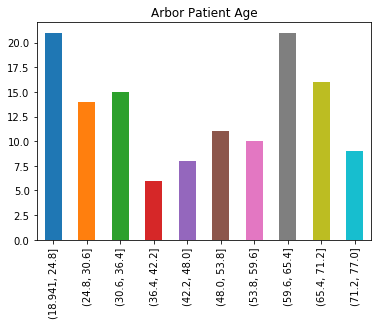

In [105]:
arbor_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='Arbor Patient Age')

In [106]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10)

(18.936999999999998, 25.2]     6
(25.2, 31.4]                   5
(31.4, 37.6]                   2
(37.6, 43.8]                   2
(43.8, 50.0]                   6
(50.0, 56.2]                  13
(56.2, 62.4]                  10
(62.4, 68.6]                  11
(68.6, 74.8]                   4
(74.8, 81.0]                   6
Name: Age(Year), dtype: int64

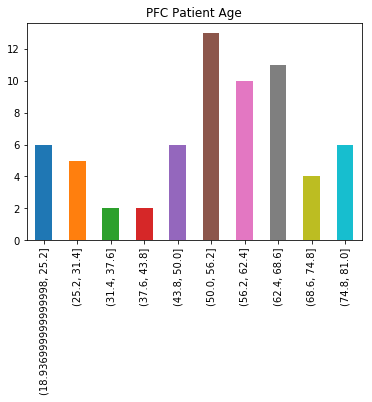

In [107]:
pfc_visits_clean['Age(Year)'].value_counts(sort=False,bins=10).plot(kind='bar', title='PFC Patient Age')

In [108]:
arbor_visits_clean['Age(Year)'].describe()

count    131.000000
mean      46.664122
std       17.963044
min       19.000000
25%       29.500000
50%       49.000000
75%       63.000000
max       77.000000
Name: Age(Year), dtype: float64

In [109]:
pfc_visits_clean['Age(Year)'].describe()

count    65.000000
mean     53.307692
std      16.407814
min      19.000000
25%      48.000000
50%      55.000000
75%      63.000000
max      81.000000
Name: Age(Year), dtype: float64

In [110]:
arbor_visits_clean['PatientNumber'].describe()

count          131
unique         119
top       N0068357
freq             2
Name: PatientNumber, dtype: object

In [111]:
pfc_visits_clean['PatientNumber'].describe()

count           65
unique          63
top       N0067878
freq             2
Name: PatientNumber, dtype: object

In [112]:
arbor_visits_clean.groupby(arbor_visits_clean['PatientNumber']).size().describe()

count    119.00000
mean       1.10084
std        0.30239
min        1.00000
25%        1.00000
50%        1.00000
75%        1.00000
max        2.00000
dtype: float64

In [113]:
pfc_visits_clean.groupby(pfc_visits_clean['PatientNumber']).size().describe()

count    63.000000
mean      1.031746
std       0.176731
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       2.000000
dtype: float64

In [114]:
def get_grouped_data(df, column, group_keys=None, summed=True):
    grouped = df.groupby(df[column])
    visits_per_group = [] if group_keys is None else np.zeros(len(group_keys))
    if group_keys is not None:
        for c, group in enumerate(group_keys):
            if group in grouped.groups:
                visits_per_group[c] = len(grouped.groups[group])
    else:
        for group in grouped.groups:
            visits_per_group.append(len(grouped.groups[group]))
        
    if summed:
        return np.sum(visits_per_group)
    else:
        return visits_per_group

In [115]:
def visits_periodic(df, period='mom', group_keys=None):
    
    periodic_visits = []
    time_points = []
    spec_usage_mom = []
    
    if period == 'mom':
        months = [val for val in range(1, 13)]
        years = [2017, 2018]
        for year in years:
            for begin_month in months:
                tp1 = (year, begin_month, 1)
                tp2 = ()
                if begin_month == 12:
                    tp2 = (year+1, 1, 1)
                else:
                    tp2 = (year, begin_month+1, 1)
                    
                filtered = time_filter(tp1,tp2, df)
                
                if filtered.values.shape[0] == 0:
                    continue
                else:
                    periodic_visits.append(get_grouped_data(filtered, 'PatientNumber'))
                    spec_usage_mom.append(get_grouped_data(filtered, 'VisitType', group_keys = group_keys, summed=False))
                    time_points.append(str(begin_month) + '/' + str(year))
                    

    return (periodic_visits, np.array(spec_usage_mom), time_points)

In [116]:
arbor_spec_clinics = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'LAB FOLLOW-UP NOTE'
    ]


periodic_visits, spec_usage_mom, time_points = visits_periodic(arbor_visits_clean, 
                                                               group_keys=arbor_spec_clinics)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

arbor_specialty_clinics_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(arbor_spec_clinics, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

arbor_specialty_clinics_df.head(12)


131
[[ 0.  0.  0. 34.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 56.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. 41.  0.  0.  0.  0.  0.  0.]]
['6/2018', '7/2018', '8/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,LAB FOLLOW-UP NOTE
6/2018,0.0,0.0,0.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0
7/2018,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0
8/2018,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:

for clinic, col_idx in zip(ARBOR_SPEC_CLINICS, range(spec_usage_mom.shape[0])):
    print clinic, col_idx



NameError: name 'ARBOR_SPEC_CLINICS' is not defined

In [118]:
arbor_visits_clean.head(3)

,LocationAbbreviation,PatientNumber,Age(Year),VisitType,Sex,VisitDateTimeTS,DateFirstKnownTS
VisitDateTimeTS,,,,,,,
2018-06-03 09:45:00,AFC,N0067522,25,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 09:04:32
2018-06-03 09:45:00,AFC,N0067508,19,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:44:35
2018-06-03 09:45:00,AFC,N0067515,19,ARBOR GENERAL VISIT,F,2018-06-03 09:45:00,2018-06-03 08:46:56


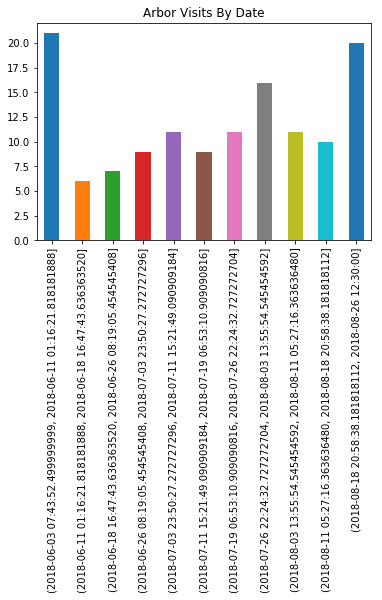

In [119]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=11).plot(kind='bar', title='Arbor Visits By Date')

In [120]:
arbor_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2018-06-03 07:43:52.499999999, 2018-06-10 09:58:45]     9
(2018-06-10 09:58:45, 2018-06-17 10:12:30]              16
(2018-06-17 10:12:30, 2018-06-24 10:26:15]               7
(2018-06-24 10:26:15, 2018-07-01 10:40:00]               9
(2018-07-01 10:40:00, 2018-07-08 10:53:45]               8
(2018-07-08 10:53:45, 2018-07-15 11:07:30]               8
(2018-07-15 11:07:30, 2018-07-22 11:21:15]              15
(2018-07-22 11:21:15, 2018-07-29 11:35:00]              18
(2018-07-29 11:35:00, 2018-08-05 11:48:45]               9
(2018-08-05 11:48:45, 2018-08-12 12:02:30]              12
(2018-08-12 12:02:30, 2018-08-19 12:16:15]              12
(2018-08-19 12:16:15, 2018-08-26 12:30:00]               8
Name: VisitDateTimeTS, dtype: int64

In [121]:
pfc_visits_clean['VisitDateTimeTS'].value_counts(sort=False,bins=12)

(2018-06-02 07:19:02.399999999, 2018-06-08 19:16:40]    6
(2018-06-08 19:16:40, 2018-06-15 05:23:20]              4
(2018-06-15 05:23:20, 2018-06-21 15:30:00]              4
(2018-06-21 15:30:00, 2018-06-28 01:36:40]              7
(2018-06-28 01:36:40, 2018-07-04 11:43:20]              4
(2018-07-04 11:43:20, 2018-07-10 21:50:00]              6
(2018-07-10 21:50:00, 2018-07-17 07:56:40]              3
(2018-07-17 07:56:40, 2018-07-23 18:03:20]              2
(2018-07-23 18:03:20, 2018-07-30 04:10:00]              6
(2018-07-30 04:10:00, 2018-08-05 14:16:40]              9
(2018-08-05 14:16:40, 2018-08-12 00:23:20]              9
(2018-08-12 00:23:20, 2018-08-18 10:30:00]              5
Name: VisitDateTimeTS, dtype: int64

In [122]:
grouped = pfc_visits_clean.groupby('VisitType')
for g in grouped.groups:
    print g
    print len(grouped.groups[g])

PFC NEW PATIENT VISIT
65


In [123]:
arbor_visits_clean.groupby('VisitType').size()

VisitType
ARBOR GENERAL VISIT    131
dtype: int64

In [157]:
df_visits = pd.read_csv(path_visits, error_bad_lines=False, header=0)
df_visits['VisitDateTimeTS'] = pd.to_datetime((df_visits['VisitDateTime']))
df_visits['DateFirstKnownTS'] = pd.to_datetime((df_visits['DateFirstKnown']))
df_visits.index = df_visits['VisitDateTimeTS']
#df_visits = df_visits.iloc[::-1]
del df_visits['DateFirstKnown']
del df_visits['VisitDateTime']

df_visits = df_visits[df_visits['LocationAbbreviation'] != 'TEST']
df_visits_clean = df_visits[df_visits['Age(Year)']> 18]
df_visits_clean.sort_values('VisitDateTimeTS', inplace=True)

/Users/alex/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [158]:
df_visits_clean.groupby('VisitType').size()

VisitType
ADMIN CHART REVIEW NOTE       6
ARBOR DERMATOLOGY             5
ARBOR FAST TRACK TB           1
ARBOR FOLLOW-UP VISIT         7
ARBOR GENERAL VISIT         131
ARBOR MENTAL HEALTH           3
ARBOR MSK                     3
ARBOR NEUROLOGY               1
ARBOR OPHTHALMOLOGY           5
ARBOR WOMEN'S HEALTH          1
BRIDGE TO CARE NOTE           5
HEALTH EDUCATOR NOTE         47
LAB FOLLOW-UP NOTE           85
MISC NOTE                    57
PATIENT NAVIGATOR NOTE       23
PFC DERMATOLOGY VISIT         7
PFC FAST TRACK                6
PFC FAST TRACK VACCINE        4
PFC FOLLOW UP VISIT          96
PFC NEW PATIENT VISIT        65
PFC OPHTHALMOLOGY VISIT      14
PFC WOMEN'S CLINIC VISIT     12
PHONE                         2
dtype: int64

In [160]:
ALL_SPEC_KEYS = [
    'ARBOR CARDIOLOGY',
    'ARBOR DERMATOLOGY',
    'ARBOR FOLLOW-UP VISIT',
    'ARBOR GENERAL VISIT',
    'ARBOR MENTAL HEALTH',
    'ARBOR MSK',
    'ARBOR NEUROLOGY',
    'ARBOR OPHTHALMOLOGY',
    "ARBOR WOMEN'S HEALTH",
    'PFC DERMATOLOGY VISIT',
    'PFC FOLLOW UP VISIT',
    'PFC HEP CLINIC VISIT',
    'PFC MENTAL HEALTH VISIT',
    'PFC NEW PATIENT VISIT',
    'PFC OPHTHALMOLOGY VISIT',
    "PFC WOMEN'S CLINIC VISIT",
    'PFC FAST TRACK VACCINE'
]


periodic_visits, spec_usage_mom, time_points = visits_periodic(df_visits_clean, 
                                                               group_keys=ALL_SPEC_KEYS)
print np.sum(periodic_visits)
print spec_usage_mom
print time_points

joint_spec_df = pd.DataFrame({clinic:spec_usage_mom[:,col_idx] 
                                     for clinic, col_idx in zip(ALL_SPEC_KEYS, range(spec_usage_mom.shape[1]))
                                    }, 
                                    index = time_points)

joint_spec_df.head(12)


586
[[ 0.  0.  7. 34.  0.  0.  0.  0.  0.  4. 34.  0.  0. 25.  3.  5.  0.]
 [ 0.  5.  0. 56.  0.  3.  1.  0.  1.  0. 36.  0.  0. 17.  9.  6.  4.]
 [ 0.  0.  0. 41.  3.  0.  0.  5.  0.  3. 26.  0.  0. 23.  2.  1.  0.]]
['6/2018', '7/2018', '8/2018']


,ARBOR CARDIOLOGY,ARBOR DERMATOLOGY,ARBOR FOLLOW-UP VISIT,ARBOR GENERAL VISIT,ARBOR MENTAL HEALTH,ARBOR MSK,ARBOR NEUROLOGY,ARBOR OPHTHALMOLOGY,ARBOR WOMEN'S HEALTH,PFC DERMATOLOGY VISIT,PFC FAST TRACK VACCINE,PFC FOLLOW UP VISIT,PFC HEP CLINIC VISIT,PFC MENTAL HEALTH VISIT,PFC NEW PATIENT VISIT,PFC OPHTHALMOLOGY VISIT,PFC WOMEN'S CLINIC VISIT
6/2018,0.0,0.0,7.0,34.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,34.0,0.0,0.0,25.0,3.0,5.0
7/2018,0.0,5.0,0.0,56.0,0.0,3.0,1.0,0.0,1.0,0.0,4.0,36.0,0.0,0.0,17.0,9.0,6.0
8/2018,0.0,0.0,0.0,41.0,3.0,0.0,0.0,5.0,0.0,3.0,0.0,26.0,0.0,0.0,23.0,2.0,1.0


In [161]:
joint_spec_df.to_csv('joint_spec_clinics.csv')